# memo

## 概要
- date: 2020/12/01
- author: kmms

## 想定ディレクトリ構成
- 試験者提供資料v03/input_t/
    - 21_train_data.csv
- 試験者提供資料v03/input_s/
    - 31_goinsight_data_s_(yyyymmdd).csv
- /
    - 採用試験問題_v03.ipynb

# Load modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ファイル読み取り

In [7]:
input_dir = "c:/pwork/試験者提供資料v03"
train_df = pd.read_csv(input_dir + "/input_t/21_train_data.csv", encoding="Shift-JIS")

# 自販機購買行動判定コンペ問題（４５分）

## 【問題①】
「21_train_data.csv」データクレンジングをして下さい。  

#### 【問題①‐１】human_idカラムがユニークであることを確認してください。重複している場合はその行を削除してください。

In [10]:
train_df['human_id'].value_counts()
# 2018/12/26-020142重複

2018/12/26-020142    2
2018/12/21-020081    1
2018/12/20-020032    1
2018/12/20-010064    1
2018/12/20-020110    1
                    ..
2018/12/17-020114    1
2018/12/27-010051    1
2018/12/21-020079    1
2018/12/21-020061    1
2018/12/19-010103    1
Name: human_id, Length: 1343, dtype: int64

In [14]:
train_df.shape

(1345, 11)

In [12]:
train_df2 = train_df.drop_duplicates(subset='human_id')

In [13]:
train_df2.shape

(1344, 11)

#### 【問題①‐２】「human_id」カラムの空欄（null）の存在を確認し、存在する場合にはそのレコードを削除してください。

In [17]:
train_df['human_id'].isnull().sum()

1

In [25]:
train_df = train_df[~train_df['human_id'].isnull()]

#### 【問題①‐３】「from_areain_to_buy_time」「price」カラムのデータ型をintgerへ変更してください。

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1344 entries, 0 to 1344
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   human_id                 1344 non-null   object 
 1   buy_behavior             1344 non-null   object 
 2   gendar_label             1344 non-null   object 
 3   age_label                1344 non-null   object 
 4   buy_date                 1344 non-null   object 
 5   buy_time                 1344 non-null   object 
 6   from_areain_to_buy_time  1344 non-null   float64
 7   price                    1344 non-null   object 
 8   cold_hot                 1344 non-null   object 
 9   category_l               1344 non-null   object 
 10  edy_cash                 1343 non-null   object 
dtypes: float64(1), object(10)
memory usage: 126.0+ KB


In [31]:
train_df['from_areain_to_buy_time'] = train_df['from_areain_to_buy_time'].astype('int8')

<ipython-input-31-cda08f4a3080>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['from_areain_to_buy_time'] = train_df['from_areain_to_buy_time'].astype('int8')


In [37]:
train_df['price'] = train_df['price'].replace('ゼロ', 0)

<ipython-input-37-dd12d813e8d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['price'] = train_df['price'].replace('ゼロ', 0)


In [38]:
train_df[train_df['price'] == 'ゼロ']

,human_id,buy_behavior,gendar_label,age_label,buy_date,buy_time,from_areain_to_buy_time,price,cold_hot,category_l,edy_cash


In [39]:
train_df['price'].astype('int8')

0         0
1       110
2      -116
3       110
4       110
       ... 
1340    110
1341    110
1342     90
1343    100
1344    110
Name: price, Length: 1344, dtype: int8

## 【問題②】
クライアントから自販機購買客の購入までの時間(from_areain_to_buy_time)について分析してほしいという依頼がありました。あなたは分析の初期段階として、年代別の購入までの時間について分析を実施することにしました。以下1~3の流れにそって「21_train_data.csv」の分析を実施してください。

#### 【問題②‐１】
年代別の購入までの時間をグラフにプロットしてください。グラフの形式は指定しないので、分かりやすいと思うグラフの種類を選択しプロットしてください。

<BarContainer object of 5 artists>

c:\users\13631\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\13631\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0, flags=flags)


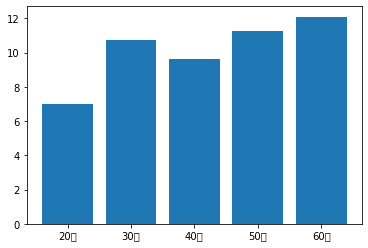

In [52]:
a = train_df.groupby('age_label')['from_areain_to_buy_time'].mean()
plt.bar(x=a.index, height=a.values)

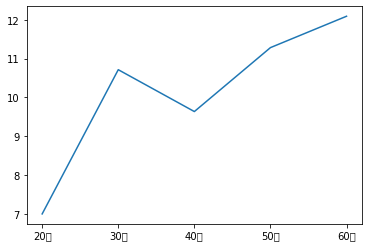

In [53]:
plt.plot(a)

#### 【問題②‐２】
【問題②‐１】の結果、60代の購入までの時間が長く、20代の購入までの時間が短いことが分かりました。あなたはその要因として、以下の仮説を立てました。  
仮説：「年代ごとbuy_behaviorの比率の違いにより、購入までの時間に差が出ている」  
(buy_behavior: 1.商品決め打ち / 2.VM決め打ち／VM内で商品比較 / 4.複数VMで比較)  
この仮説を確かめるために必要だと思う分析を実施してください。時間に余裕があれば、数値を算出するだけではなくグラフもプロットしてください。

In [64]:
a = train_df.groupby('age_label')['buy_behavior'].value_counts(normalize=True, )
aa = pd.DataFrame(a)
aa

buy_behavior
age_label buy_behavior                   
20代       4.複数VMで比較              0.600000
          1.商品決め打ち               0.300000
          2.VM決め打ち／VM内で商品比較      0.100000
30代       1.商品決め打ち               0.544218
          4.複数VMで比較              0.346939
          2.VM決め打ち／VM内で商品比較      0.108844
40代       1.商品決め打ち               0.609959
          4.複数VMで比較              0.307054
          2.VM決め打ち／VM内で商品比較      0.082988
50代       1.商品決め打ち               0.537849
          4.複数VMで比較              0.390438
          2.VM決め打ち／VM内で商品比較      0.071713
60代       1.商品決め打ち               0.515152
          4.複数VMで比較              0.393939
          2.VM決め打ち／VM内で商品比較      0.090909

#### 【問題②‐３】
【問題②‐２】の分析の結果から言えることを、以下の①、②から選択してください。  
①仮説は正しそうだ  
②仮説は正しくなさそうだ

## 【問題③】
human_id毎の滞在時間を計算してください。

#### 【問題③‐１】
「31_goinsight_data_s_201912XX」８ファイルを縦に結合し1つのテーブルにして下さい。

In [66]:
path = [
    "C:/pwork/試験者提供資料v03/input_s/31_goinsight_data_s_20191217.csv",
    "C:/pwork/試験者提供資料v03/input_s/31_goinsight_data_s_20191218.csv",
    "C:/pwork/試験者提供資料v03/input_s/31_goinsight_data_s_20191219.csv",
    "C:/pwork/試験者提供資料v03/input_s/31_goinsight_data_s_20191220.csv",
    "C:/pwork/試験者提供資料v03/input_s/31_goinsight_data_s_20191221.csv",
    "C:/pwork/試験者提供資料v03/input_s/31_goinsight_data_s_20191225.csv",
    "C:/pwork/試験者提供資料v03/input_s/31_goinsight_data_s_20191226.csv",
    "C:/pwork/試験者提供資料v03/input_s/31_goinsight_data_s_20191227.csv",
]

def readCsv(path):
    return pd.read_csv(path, encoding="Shift-JIS")

In [67]:
map_list = map(readCsv, path)
df = pd.concat(map_list)

In [68]:
df.shape

(9769, 7)

#### 【問題③‐２】
滞在時間をhuman_idごとに計算してください。  
ただし、滞在時間は以下の通り求められるものとします。  
 - 滞在時間 ＝ エリアアウト（event_datetime）― エリアイン（event_datetime）  
 ※human_idにつき1滞在時間となるように計算してして下さい。複数回エリアインとエリアアウトを繰り返す場合は最初のエリアインと最後のエリアアウトを使用するもとします。

In [83]:
jinlai = df[df['event_name'] == 'エリアイン']
chuqu = df[df['event_name'] == 'エリアアウト'][['human_id', 'event_datetime']]

In [84]:
print((jinlai.shape), (chuqu.shape))

(3825, 7) (3823, 2)


In [85]:
jinlai2 = jinlai.drop_duplicates(subset='human_id', keep='first')
chuqu2 = chuqu.drop_duplicates(subset='human_id', keep='last')

In [86]:
print((jinlai2.shape), (chuqu2.shape))

(2325, 7) (2323, 2)


In [87]:
df02 = pd.merge(jinlai2, chuqu2, on='human_id')

In [88]:
df02.shape

(2323, 8)

In [92]:
df02['event_datetime_y'] = pd.to_datetime(df02['event_datetime_y'])
df02['event_datetime_x'] = pd.to_datetime(df02['event_datetime_x'])

In [93]:
df02['from_areain_to_buy_time'] = (df02['event_datetime_y'] - df02['event_datetime_x'])

In [98]:
df02['from_areain_to_buy_time'].astype('timedelta64[s]').astype(int)

0       19
1       27
2       32
3        9
4       71
        ..
2318    27
2319    34
2320     5
2321    32
2322    18
Name: from_areain_to_buy_time, Length: 2323, dtype: int32

# 統計量・数理モデル知識問題（１０分）

#### 【統計量知識試験】
図１（左図）のヒストグラムに対応する箱ひげ図を図２（右図）の⓪～⑦のうちから一つ選べ。

#### 【数理モデル試験】
モデル1 と モデル2 は, 次に示す データ に対し2種類の手法を用いて回帰を行った予測式である.  
これに関して, 2種類の手法の名称として最も適切なものをそれぞれ次の選択肢 (ア)～(コ) から選べ.

#### モデル1の回答

#### モデル2の回答